In [1]:
import pyfpgrowth
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('OnlineRetailShopGermany.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [3]:
df.shape

(9495, 8)

In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [5]:
print (df.isnull().values.any())
#print (df.isnull().sum())

False


In [6]:
missing_value = ["NaN", "NONE", "None", "nan", "none", "n/a", "na", " "]
df = pd.read_csv('OnlineRetailShopGermany.csv', na_values = missing_value)
print (df.isnull().sum())
# print (len(df[df.Description.isin(missing_value)]))
# df[df.Description.isin(missing_value)]

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
df['Description'] = df['Description'].str.strip() #removes spaces from beginning and end

In [8]:
# ranking the top 10 best-selling items
df.Description.value_counts(normalize=True)[:10]

POSTAGE                               0.040337
ROUND SNACK BOXES SET OF4 WOODLAND    0.012638
REGENCY CAKESTAND 3 TIER              0.008531
ROUND SNACK BOXES SET OF 4 FRUITS     0.008215
PLASTERS IN TIN WOODLAND ANIMALS      0.007056
WOODLAND CHARLOTTE BAG                0.006214
PLASTERS IN TIN CIRCUS PARADE         0.006003
PLASTERS IN TIN SPACEBOY              0.005371
6 RIBBONS RUSTIC CHARM                0.005266
JUMBO BAG WOODLAND ANIMALS            0.005055
Name: Description, dtype: float64

In [9]:
df.drop(df[df['Description'] == 'POSTAGE'].index, inplace = True)
df.shape

(9112, 8)

In [10]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = df[df.duplicated()]
# print(duplicateRows.head())
df = df.drop_duplicates()

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Percentage')]

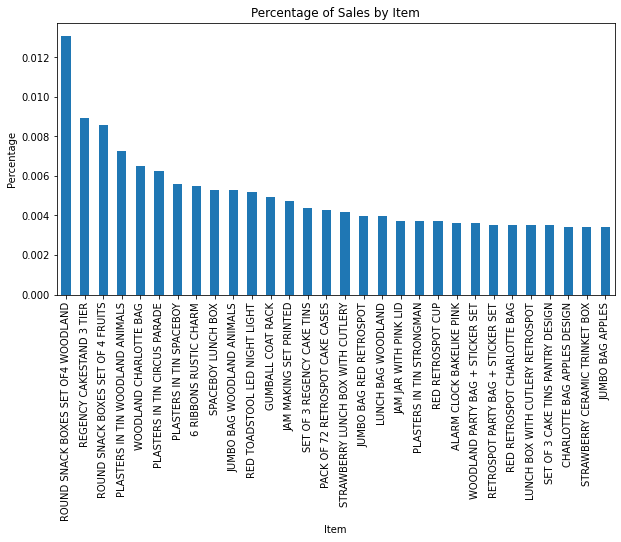

In [11]:
# create a bar chart, rank by percentage
df.Description.value_counts(normalize=True)[:30].plot(kind="bar", figsize=(10,5), title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Total Number')]

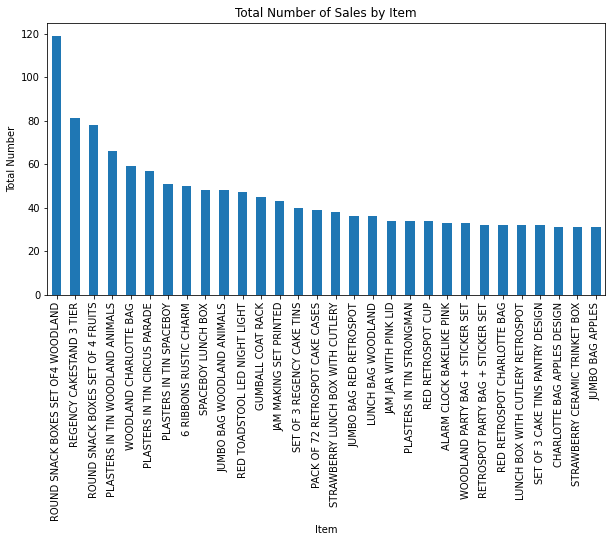

In [12]:
# create a bar chart, rank by value
df.Description.value_counts()[:30].plot(kind="bar", figsize=(10,5), title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

In [13]:
# Create transactions for each of the InvoiceNo.

grouped_df = df.groupby(by = ['InvoiceNo'])

transactions = []
for group, pdf in grouped_df:
    transactions.append(pdf['Description'].tolist())
    
transactions

[['SET OF 6 T-LIGHTS SANTA',
  'ROTATING SILVER ANGELS T-LIGHT HLDR',
  'MULTI COLOUR SILVER T-LIGHT HOLDER',
  '5 HOOK HANGER MAGIC TOADSTOOL',
  '3 HOOK HANGER MAGIC GARDEN',
  '5 HOOK HANGER RED MAGIC TOADSTOOL',
  'ASSORTED COLOUR LIZARD SUCTION HOOK',
  'JUMBO BAG WOODLAND ANIMALS',
  'JUMBO BAG OWLS',
  'HOT WATER BOTTLE BABUSHKA',
  'HOMEMADE JAM SCENTED CANDLES',
  "CHILDREN'S CIRCUS PARADE MUG",
  'PACK 3 FIRE ENGINE/CAR PATCHES',
  'PICTURE DOMINOES'],
 ['JAM MAKING SET PRINTED',
  'JAM JAR WITH PINK LID',
  'JAM JAR WITH GREEN LID',
  'SWEETHEART CAKESTAND 3 TIER',
  '60 CAKE CASES VINTAGE CHRISTMAS',
  '6 RIBBONS RUSTIC CHARM',
  'CAKE STAND WHITE TWO TIER LACE',
  'PACK OF 60 PINK PAISLEY CAKE CASES',
  '60 TEATIME FAIRY CAKE CASES',
  'PACK OF 72 RETROSPOT CAKE CASES'],
 ['FELTCRAFT 6 FLOWER FRIENDS',
  '6 RIBBONS RUSTIC CHARM',
  'WOODLAND  HEIGHT CHART STICKERS',
  'CHILDS BREAKFAST SET CIRCUS PARADE',
  'CHILDS BREAKFAST SET SPACEBOY',
  'COFFEE MUG CAT + BIRD DESIGN',

In [14]:
# Find the frequent patterns with support_threshold of 2
start_time = time.time()
patterns = pyfpgrowth.find_frequent_patterns(transactions, 10)
end_time = time.time()
patterns
print(end_time-start_time)

0.05186009407043457


In [15]:
# Generate association rules with confidence_threshold of 0.7

rules = pyfpgrowth.generate_association_rules(patterns, 0.5)
rules

{('DINOSAUR PARTY BAG + STICKER SET',): (('WOODLAND PARTY BAG + STICKER SET',),
  1.0),
 ('BLUE VINTAGE SPOT BEAKER',): (('PINK VINTAGE SPOT BEAKER',),
  0.7857142857142857),
 ('PINK VINTAGE SPOT BEAKER',): (('BLUE VINTAGE SPOT BEAKER',), 1.0),
 ('DOLLY GIRL CHILDRENS BOWL',): (('DOLLY GIRL CHILDRENS CUP',),
  0.8571428571428571),
 ('DOLLY GIRL CHILDRENS CUP',): (('DOLLY GIRL CHILDRENS BOWL',), 1.0),
 ('BLUE OWL SOFT TOY',): (('PINK OWL SOFT TOY',), 0.6666666666666666),
 ('PINK OWL SOFT TOY',): (('BLUE OWL SOFT TOY',), 0.7692307692307693),
 ('BLUE POLKADOT PLATE',): (('BLUE POLKADOT CUP',), 0.7142857142857143),
 ('STRAWBERRY CHARLOTTE BAG',): (('WOODLAND CHARLOTTE BAG',),
  0.7142857142857143),
 ('JUMBO BAG SPACEBOY DESIGN',): (('JUMBO BAG RED RETROSPOT',),
  0.7857142857142857),
 ('LUNCH BAG SPACEBOY DESIGN',): (('LUNCH BAG WOODLAND',), 0.7142857142857143),
 ('CHARLOTTE BAG VINTAGE ALPHABET',): (('ROUND SNACK BOXES SET OF4 WOODLAND',),
  0.7142857142857143),
 ('JUMBO BAG PEARS',): (('

In [18]:
df5 = pd.DataFrame(rules)

In [21]:
df5.head()

DINOSAUR PARTY BAG + STICKER SET     BLUE VINTAGE SPOT BEAKER  \
                                   NaN                          NaN   
                                   NaN                          NaN   
0  (WOODLAND PARTY BAG + STICKER SET,)  (PINK VINTAGE SPOT BEAKER,)   
1                                    1                     0.785714   

      PINK VINTAGE SPOT BEAKER    DOLLY GIRL CHILDRENS BOWL  \
                           NaN                          NaN   
                           NaN                          NaN   
0  (BLUE VINTAGE SPOT BEAKER,)  (DOLLY GIRL CHILDRENS CUP,)   
1                            1                     0.857143   

       DOLLY GIRL CHILDRENS CUP     BLUE OWL SOFT TOY     PINK OWL SOFT TOY  \
                            NaN                   NaN                   NaN   
                            NaN                   NaN                   NaN   
0  (DOLLY GIRL CHILDRENS BOWL,)  (PINK OWL SOFT TOY,)  (BLUE OWL SOFT TOY,)   
1                             1              0.666667              0.769231   

    BLUE POLKADOT PLATE   STRAWBERRY CHARLOTTE BAG  \
                    NaN                        NaN   
                    NaN                        NaN   
0  (BLUE POLKADOT CUP,)  (WOODLAND CHARLOTTE BAG,)   
1              0.714286                   0.714286   

    JUMBO BAG SPACEBOY DESIGN  ...         PLASTERS IN TIN CIRCUS PARADE  \
                          NaN  ...      PLASTERS IN TIN WOODLAND ANIMALS   
                          NaN  ...    ROUND SNACK BOXES SET OF4 WOODLAND   
0  (JUMBO BAG RED RETROSPOT,)  ...  (ROUND SNACK BOXES SET OF 4 FRUITS,)   
1                    0.785714  ...                              0.666667   

                                         PLASTERS IN TIN WOODLAND ANIMALS  \
     ROUND SNACK BOXES SET OF 4 FRUITS  ROUND SNACK BOXES SET OF 4 FRUITS   
    ROUND SNACK BOXES SET OF4 WOODLAND ROUND SNACK BOXES SET OF4 WOODLAND   
0  (PLASTERS IN TIN WOODLAND ANIMALS,)   (PLASTERS IN TIN CIRCUS PARADE,)   
1                             0.631579                           0.631579   

         PLASTERS IN TIN CIRCUS PARADE      PLASTERS IN TIN WOODLAND ANIMALS  \
    ROUND SNACK BOXES SET OF4 WOODLAND    ROUND SNACK BOXES SET OF4 WOODLAND   
                                   NaN                                   NaN   
0  (PLASTERS IN TIN WOODLAND ANIMALS,)  (ROUND SNACK BOXES SET OF 4 FRUITS,)   
1                             0.666667                              0.558824   

       ROUND SNACK BOXES SET OF 4 FRUITS  \
                  WOODLAND CHARLOTTE BAG   
                                     NaN   
0  (ROUND SNACK BOXES SET OF4 WOODLAND,)   
1                               0.818182   

     ROUND SNACK BOXES SET OF4 WOODLAND  \
                 WOODLAND CHARLOTTE BAG   
                                    NaN   
0  (ROUND SNACK BOXES SET OF 4 FRUITS,)   
1                               0.62069   

                REGENCY CAKESTAND 3 TIER  \
       ROUND SNACK BOXES SET OF 4 FRUITS   
                                     NaN   
0  (ROUND SNACK BOXES SET OF4 WOODLAND,)   
1                               0.833333   

                                           ROUND SNACK BOXES SET OF4 WOODLAND  
     ROUND SNACK BOXES SET OF4 WOODLAND                                   NaN  
                                    NaN                                   NaN  
0  (ROUND SNACK BOXES SET OF 4 FRUITS,)  (ROUND SNACK BOXES SET OF 4 FRUITS,)  
1                                   0.5                              0.521008  

[2 rows x 117 columns]